## 실습 #2 - Linear regression using car data

#### 1. 다음은 P 자동차 회사의 차종과 마력, 그리고 평균 연비(단위 : km/l)를 나타내는 표이다.
▶ P 자동차 회사의 마력과 연비 사이에는 어떤 상관 관계가 있을까? 선형 회귀 분석을 통해서 선형 회귀 모델의 절편과 계수를 구하라. 마지막으로 이 선형 회귀 모델이 입력 마력 값에 대해 연비를 예측하는 데 얼마나 적합한지 예측 점수를 출력해 보자.

In [1]:
import pandas as pd

df = pd.DataFrame({
    'name':['A','B','C','D','E','F','G'],
    'horse power': [130,250,190,300,210,220,170],
    'efficiency':[16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]
})
vehicle_df = df.set_index('name')   # 인덱스
vehicle_df


,horse power,efficiency
name,,
A,130,16.3
B,250,10.2
C,190,11.1
D,300,7.1
E,210,12.1
F,220,13.2
G,170,14.2


In [2]:
from sklearn.linear_model import LinearRegression

X = vehicle_df[['horse power']] # 독립변수
Y = vehicle_df[['efficiency']]  # 종속변수

lin_model1 = LinearRegression() # 모델 객체 생성
lin_model1.fit(X,Y)             # 모델 학습

LinearRegression()

In [4]:
# 회귀 모델의 계수, 절편, 점수
print('weight: ', lin_model1.coef_)   
print('bias: ', lin_model1.intercept_)
print('score:', lin_model1.score(X,Y))

print('270 마력 자동차의 예상 연비: ', lin_model1.predict([[270]]))

weight:  [[-0.05027473]]
bias:  [22.58626374]
score: 0.8706727649378526
270 마력 자동차의 예상 연비:  [[9.01208791]]


C:\Users\wshkk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 2. 자동차의 연비에 영향을 미치는 요소는 마력뿐만 아니라 총중량도 중요한 요소가 될 것이다. 다음은 P 자동차 회사의 차종과 마력, 총중량(단위 :kg)을 추가한 표이다.
▶ 위의 자료를 바탕으로 적절한 선형 회귀 모델을 구현해 보자. 이 모델의 절편, 예측 모델의 점수를 출력하라.

In [5]:
# 총 중량이라는 독립변수 추가
df = pd.DataFrame({
    'name' : ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'horse power' : [130, 250, 190, 300, 210, 220, 170], 
    'weight': [1900, 2600, 2200, 2900, 2400, 2300, 2100],
    'efficiency': [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2] })

vehicle_df = df.set_index('name')
print(vehicle_df)
df.columns

      horse power  weight  efficiency
name                                 
A             130    1900        16.3
B             250    2600        10.2
C             190    2200        11.1
D             300    2900         7.1
E             210    2400        12.1
F             220    2300        13.2
G             170    2100        14.2


Index(['name', 'horse power', 'weight', 'efficiency'], dtype='object')

In [6]:
# 모델 학습
X = vehicle_df[['horse power', 'weight']] # 독립변수
Y = vehicle_df['efficiency']        # 종속변수

lin_model1 = LinearRegression()  # 모델 생성
lin_model1.fit(X, Y)  # 학습시키는 과정

print('weight: ', lin_model1.coef_)
print('bias: ', lin_model1.intercept_)
print('score: ', lin_model1.score(X,Y))

weight:  [-0.00689189 -0.00731081]
bias:  30.60405405405405
score:  0.8871254041192396


C:\Users\wshkk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


270마력, 2500kg 자동차의 예상 연비 :  10.47


<AxesSubplot:>

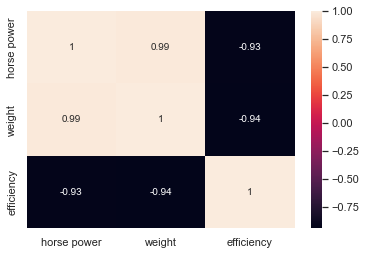

In [7]:
print('270마력, 2500kg 자동차의 예상 연비 : ', round(lin_model1.predict([[270,2500]])[0],2))

# 상관관계
import seaborn as sns

sns.set(rc = {'figure.figsize':(10, 10)})
correlation_matrix = vehicle_df.corr()
sns.heatmap(data = correlation_matrix, annot=True)